In [13]:
import pandas as pd

# 공백 또는 탭 구분 자동 처리
df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)

# 컬럼명 부여 (예시)
df.columns = [
    'area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
    'asymmetry_coefficient', 'kernel_groove_length', 'class'
]

df.head()


<ipython-input-13-cb284271a3ee>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   kernel_groove_length   210 non-null    float64
 7   class                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
df.isnull().sum()

area                     0
perimeter                0
compactness              0
kernel_length            0
kernel_width             0
asymmetry_coefficient    0
kernel_groove_length     0
class                    0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

In [16]:
# class 열이 마지막 열이라고 가정할 때
df.iloc[:, -1] -= 1  # 1,2,3 → 0,1,2

X = df.drop('class', axis=1).values
y = df['class'].values

# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 원-핫 인코딩 (다중 분류일 경우)
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [17]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(tf.keras.layers.Dense(32, activation='relu'))
model1.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


d:\python\envs\torch_ev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.1714 - loss: 1.1482 - val_accuracy: 0.5882 - val_loss: 0.9519
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5816 - loss: 0.9808 - val_accuracy: 0.7647 - val_loss: 0.7878
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7394 - loss: 0.8493 - val_accuracy: 0.8529 - val_loss: 0.6660
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7906 - loss: 0.7600 - val_accuracy: 0.8824 - val_loss: 0.5784
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7949 - loss: 0.6787 - val_accuracy: 0.8824 - val_loss: 0.5068
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8139 - loss: 0.6215 - val_accuracy: 0.9118 - val_loss: 0.4500
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8561 - loss: 0.5467 - val_accuracy: 0.9118 - val_loss: 0.4050
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8755 - loss: 0.5055 - val_accuracy: 0.9118 - val_loss: 0.3685
Epoch 9/20


In [18]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3713 - loss: 1.1014 - val_accuracy: 0.2647 - val_loss: 1.0373
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5644 - loss: 0.9737 - val_accuracy: 0.7059 - val_loss: 0.9242
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8380 - loss: 0.8852 - val_accuracy: 0.8824 - val_loss: 0.8232
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9079 - loss: 0.8053 - val_accuracy: 0.9412 - val_loss: 0.7339
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9068 - loss: 0.7395 - val_accuracy: 0.9412 - val_loss: 0.6568
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9324 - loss: 0.6531 - val_accuracy: 0.9412 - val_loss: 0.5848
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9186 - loss: 0.5927 - val_accuracy: 0.9412 - val_loss: 0.5197
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9085 - loss: 0.5340 - val_accuracy: 0.9412 - val_loss: 0.4575


In [19]:
class SEEDSModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(SEEDSModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(64, activation='relu')
        self.d2 = tf.keras.layers.Dense(32, activation='relu')
        self.out = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.out(x)

model3 = SEEDSModel(num_classes)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6226 - loss: 0.9892 - val_accuracy: 0.9118 - val_loss: 0.8713
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8642 - loss: 0.8910 - val_accuracy: 0.9412 - val_loss: 0.7653
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9179 - loss: 0.7741 - val_accuracy: 0.9412 - val_loss: 0.6699
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9212 - loss: 0.7079 - val_accuracy: 0.9412 - val_loss: 0.5907
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9416 - loss: 0.6207 - val_accuracy: 0.9118 - val_loss: 0.5242
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9429 - loss: 0.5693 - val_accuracy: 0.9118 - val_loss: 0.4669
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9312 - loss: 0.5298 - val_accuracy: 0.9118 - val_loss: 0.4201
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9200 - loss: 0.4822 - val_accuracy: 0.9118 - val_loss: 0.3802


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    # 예측
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # 혼동 행렬
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n🔹 {model_name} - Confusion Matrix:")
    print(cm)

    # 시각화
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # 분류 리포트 (precision, recall, f1-score)
    print(f"\n🔹 {model_name} - Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

🔹 Sequential Model - Confusion Matrix:
[[10  0  1]
 [ 0 14  0]
 [ 2  0 15]]


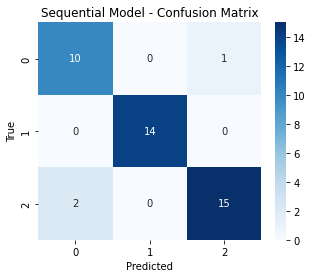


🔹 Sequential Model - Classification Report:
              precision    recall  f1-score   support

           0     0.8333    0.9091    0.8696        11
           1     1.0000    1.0000    1.0000        14
           2     0.9375    0.8824    0.9091        17

    accuracy                         0.9286        42
   macro avg     0.9236    0.9305    0.9262        42
weighted avg     0.9311    0.9286    0.9290        42



In [24]:
evaluate_model(model1, X_test, y_test, model_name="Sequential Model")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

🔹 Functional Model - Confusion Matrix:
[[10  0  1]
 [ 0 14  0]
 [ 2  0 15]]


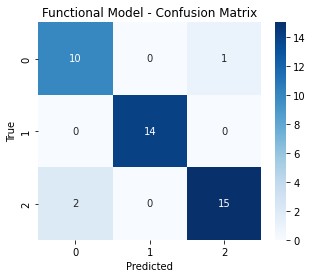


🔹 Functional Model - Classification Report:
              precision    recall  f1-score   support

           0     0.8333    0.9091    0.8696        11
           1     1.0000    1.0000    1.0000        14
           2     0.9375    0.8824    0.9091        17

    accuracy                         0.9286        42
   macro avg     0.9236    0.9305    0.9262        42
weighted avg     0.9311    0.9286    0.9290        42



In [25]:
evaluate_model(model2, X_test, y_test, model_name="Functional Model")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step 

🔹 Class-based Model - Confusion Matrix:
[[10  0  1]
 [ 0 14  0]
 [ 2  0 15]]


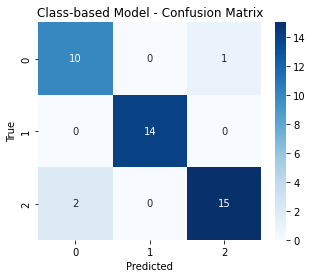


🔹 Class-based Model - Classification Report:
              precision    recall  f1-score   support

           0     0.8333    0.9091    0.8696        11
           1     1.0000    1.0000    1.0000        14
           2     0.9375    0.8824    0.9091        17

    accuracy                         0.9286        42
   macro avg     0.9236    0.9305    0.9262        42
weighted avg     0.9311    0.9286    0.9290        42



In [26]:
evaluate_model(model3, X_test, y_test, model_name="Class-based Model")